### Ejercicio Clase 2: Mini Batch y First Order Momentum

### Alumno: Lucas Rivela

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
X = np.linspace(-50, 50, 150)

In [4]:
# Ecuacion Original
y = [- (x_ - 3)**2 + 2 + 0.1 * math.sin(10*x_) for x_ in X ] 
y = np.array(y)

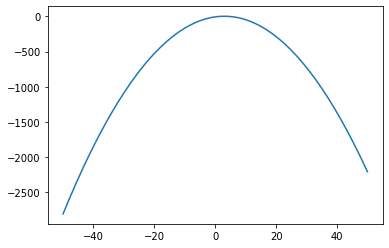

In [5]:
plt.plot(X, y)

In [6]:
# Hiperparametros
n_epochs = 150
alfa = 0.01
batches = 15

In [94]:
w1 = random.uniform(0, 1)
w2 = random.uniform(0, 1)
b = random.uniform(0, 1)

In [21]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.vstack((X,y))
    data = data.T
    for i in range(0, data.shape[0], batch_size):
        mini_batch = np.array(data[i: i + batch_size,])
        mini_batches.append(mini_batch)
    
    return mini_batches

In [96]:
def calculate_y_hat(X, w1, w2, b):
    y_hat = w1*(X**2) + w2*(X) + [b] * len(X)
    return y_hat

In [85]:
def calculate_loss_w1(err, X_batch):
    loss = -2 * err * np.sum(X_batch**2)
    return np.sum(loss) / len(X_batch)


In [86]:
def calculate_loss_w2(err, X_batch):
    loss = -2 * err * np.sum(X_batch)
    return np.sum(loss) / len(X_batch)

In [83]:
def calculate_loss_b(err, X_batch):
    loss = -2 * err
    return np.sum(loss) / len(X_batch)

In [88]:
batch_list = create_mini_batches(X, y, batches)
ecm = []
for e in range(n_epochs):
    mse_batch = 0
    for batch in batch_list:
        y_hat = calculate_y_hat(batch[:,0], w1, w2, b)
        #print(y_hat)
        err = (batch[:,1] - y_hat)
        loss_w1 = calculate_loss_w1(err, batch[:,0])
        loss_w2 = calculate_loss_w2(err, batch[:,0])
        loss_b = calculate_loss_b(err, batch[:,0])
        w1 = w1 - alfa * loss_w1
        w2 = w2 - alfa * loss_w2
        b = b - alfa * loss_b
        #print(w1, w2, b)
        mse_batch += np.sum(err ** 2)
    ecm.append(mse_batch)
        

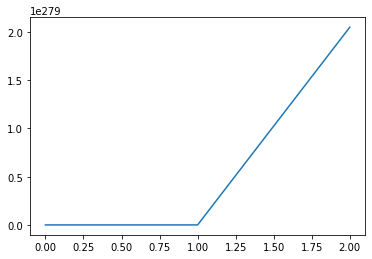

In [77]:
plt.plot(range(n_epochs), ecm)

In [95]:
y = - (1 - 3)**2 + 2 + 0.1 * math.sin(10*1)
print(y)

print(calculate_y_hat(np.array([1]), w1, w2, b))

-2.0544021110889368
[1] 0.2900567544295609 0.7198681956993944 0.3953835692767428
[1.40530852]
